# Borderline SMOTE Analysis

<blockquote>

- Creates new observations by utilizing interpolation between observations of the minority class and their closest neighbours.

- It does not use all observations from the minority class as templates, unlike SMOTE.

- It selects the observations (from the minority class) from which, most of their closest neighbours belong to a different class (DANGER group).

- Variant 1 creates new observations identical to SMOTE, between observations in the Danger group and their closest neighbours from the minority class.
    
- Variant 2 creates new observations between observations in the Danger group and the neighbours from the minority and majority classes.
</blockquote>

---

## Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import (
    make_blobs,
    make_classification
)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import BorderlineSMOTE

plt.style.use("dark_background")

## Create Data

In [8]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples = num_samples_total,
    centers = centers,
    n_features= num_features_for_samples,
    cluster_std= cluster_std
)

# transform arrays into pandas formats
X = pd.DataFrame(X, columns = ["VarA", "VarB"])
y = pd.Series(y)


# create an imbalanced dataset
# make blobs creates the same number of observations per class

X = pd.concat([
    X[y ==0],
    X[y == 1].sample(200, random_state = 42)
], axis = 0)

y = y.loc[X.index]

# display size
X.shape, y.shape 

((1000, 2), (1000,))

In [9]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(
        n_samples = 1000,
        n_features= 2,
        n_redundant = 0,
        n_clusters_per_class= 1,
        weights= [0.99],
        class_sep= sep,
        random_state= 11
    )
    
    X = pd.DataFrame(X, columns = ["VarX", "VarZ"])
    y = pd.Series(y)
    
    return X, y

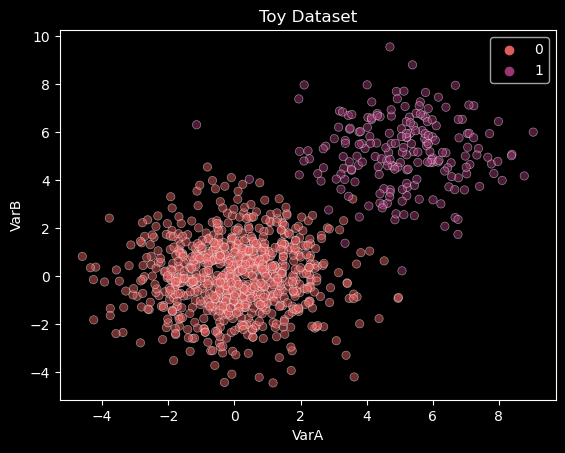

In [10]:
sns.scatterplot(
    data = X, 
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)
plt.title("Toy Dataset");

## Borderline SMOTE

In [11]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy = "auto",
    random_state = 75,
    k_neighbors = 5,
    m_neighbors = 10,
    kind = "borderline-1"
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

In [12]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy = "auto",
    random_state = 7,
    k_neighbors = 5,
    m_neighbors = 10,
    kind = "borderline-2"
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

In [13]:
# size of the original dataset

X.shape, y.shape

((1000, 2), (1000,))

In [14]:
# size of under-sample data by borderline SMOTE version 1

X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [15]:
# size of under-sample data by borderline SMOTE version 2

X_res_b2.shape, y_res_b2.shape

((1600, 2), (1600,))

In [16]:
# number of minority class observations

y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

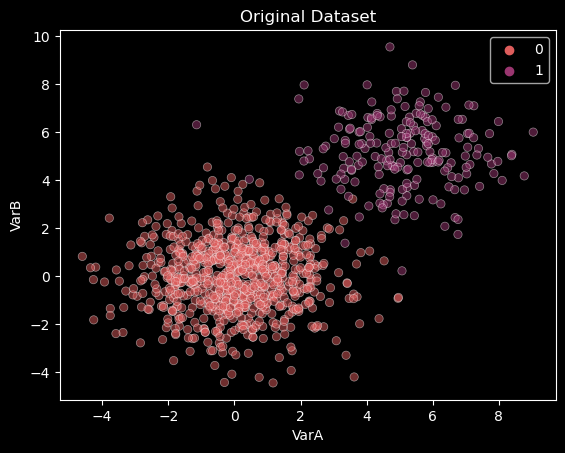

In [17]:
# plot of original data

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Original Dataset");

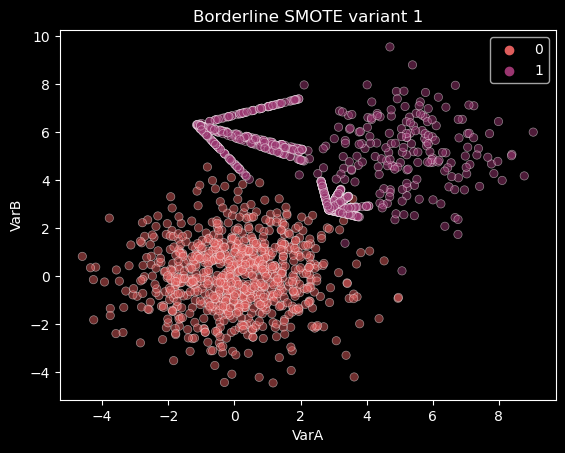

In [18]:
# plot of Borderline SMOTE variant 1

sns.scatterplot(
    data = X_res_b1,
    x = "VarA",
    y = "VarB",
    hue = y_res_b1,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Borderline SMOTE variant 1");

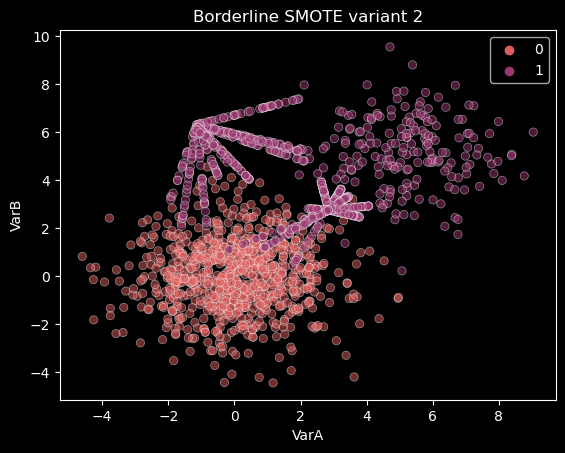

In [19]:
# plot of Borderline SMOTE variant 2

sns.scatterplot(
    data = X_res_b2,
    x = "VarA",
    y = "VarB",
    hue = y_res_b2,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Borderline SMOTE variant 2");

<blockquote> Based on the plots, variation 2 creates more synthetic data closer to boundary of the majority class.</blockquote>

## Create Well separated classes

In [20]:
# Create dataset

X, y = make_data(sep = 2)

# set up Borderline SMOTE transformer

sm_b1 = BorderlineSMOTE(
    sampling_strategy= "auto",
    k_neighbors= 5,
    m_neighbors= 10,
    kind = "borderline-1",
    random_state= 67
)

X_resampled_b1, y_resampled_b1 = sm_b1.fit_resample(X, y)

In [21]:
# Create dataset

X, y = make_data(sep = 2)

# set up Borderline SMOTE transformer

sm_b1 = BorderlineSMOTE(
    sampling_strategy= "auto",
    k_neighbors= 5,
    m_neighbors= 10,
    kind = "borderline-1",
    random_state= 83
)

X_resampled_b1, y_resampled_b1 = sm_b1.fit_resample(X, y)

In [22]:
X_resampled_b1.shape, y_resampled_b1.shape

((1974, 2), (1974,))

In [23]:
# number of minority class observations
y.value_counts()

0    987
1     13
Name: count, dtype: int64

In [24]:
y_resampled_b1.value_counts()

0    987
1    987
Name: count, dtype: int64

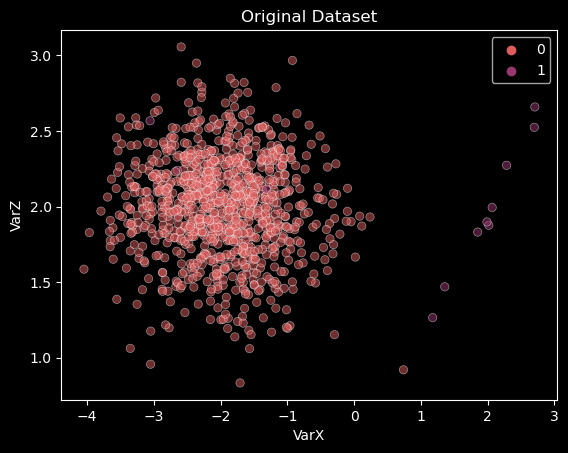

In [25]:
sns.scatterplot(
    data = X,
    x = "VarX",
    y = "VarZ",
    hue = y,
    palette= "flare",
    alpha = 0.5
)
plt.title("Original Dataset");

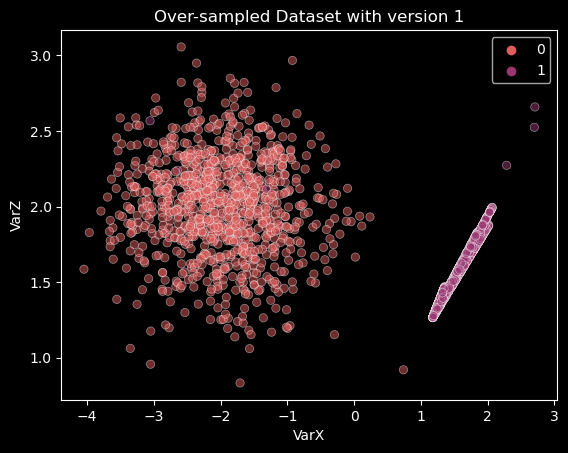

In [28]:
# plot over-sampled dataset

sns.scatterplot(
    data = X_resampled_b1,
    x = "VarX",
    y = "VarZ",
    hue = y_resampled_b1,
    palette = "flare",
    alpha = 0.5
)
plt.title("Over-sampled Dataset with version 1");

In [27]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy= "auto",
    k_neighbors= 5,
    m_neighbors= 10,
    kind = "borderline-1",
    random_state= 88
)

X_resampled_b2, y_resampled_b2 = sm_b2.fit_resample(X, y)

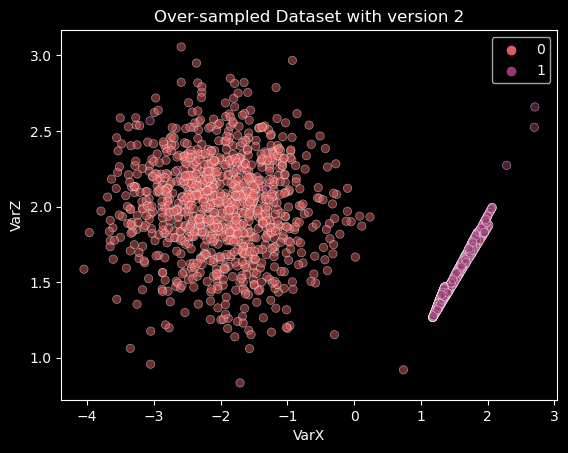

In [29]:
# plot over-sampled dataset

sns.scatterplot(
    data = X_resampled_b2,
    x = "VarX",
    y = "VarZ",
    hue = y_resampled_b2,
    palette = "flare",
    alpha = 0.5
)
plt.title("Over-sampled Dataset with version 2");

### Partially separated classes

In [30]:
X, y = make_data(sep = 0.5)

sm_b1 = BorderlineSMOTE(
    sampling_strategy= "auto",
    k_neighbors= 5,
    m_neighbors= 10,
    kind = "borderline-1"
)

X_resampled_b1, y_res_b1 = sm_b1.fit_resample(X, y)

In [32]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy= "auto",
    k_neighbors= 5,
    m_neighbors= 10,
    kind = "borderline-2"
)

X_resampled_b2, y_resampled_b2 = sm_b2.fit_resample(X, y)

In [33]:
# Size of resampled data with version 1

X_resampled_b1.shape, y_resampled_b1.shape

((1974, 2), (1974,))

In [34]:
# Size of resampled data with version 2

X_resampled_b2.shape, y_resampled_b2.shape

((1973, 2), (1973,))

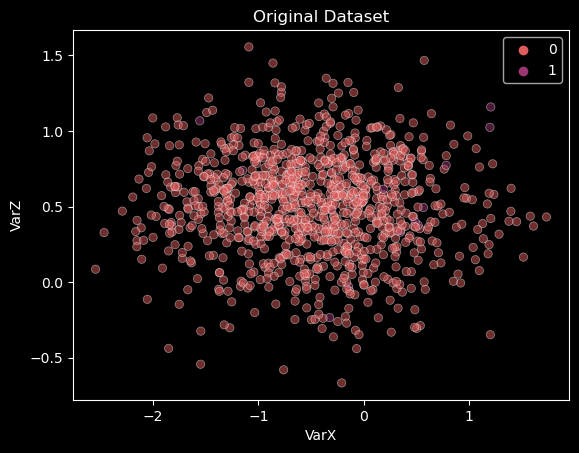

In [39]:
sns.scatterplot(
    data = X,
    x = "VarX",
    y = "VarZ",
    hue = y,
    palette= "flare",
    alpha = 0.5
)
plt.title("Original Dataset");

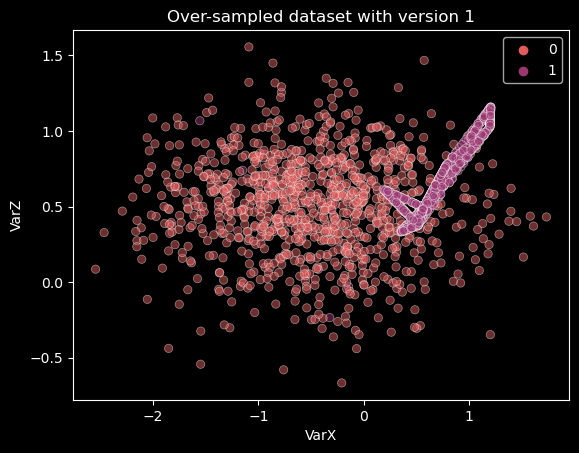

In [42]:
sns.scatterplot(
    data = X_resampled_b1,
    x = "VarX",
    y = "VarZ",
    palette= "flare",
    hue = y_resampled_b1,
    alpha = 0.5
)
plt.title("Over-sampled dataset with version 1");

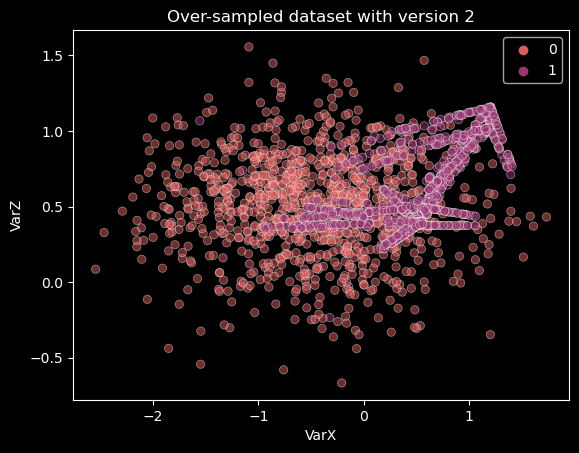

In [43]:
sns.scatterplot(
    data = X_resampled_b2,
    x = "VarX",
    y = "VarZ",
    palette= "flare",
    hue = y_resampled_b2,
    alpha = 0.5
)
plt.title("Over-sampled dataset with version 2");

---